In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [66]:
url = "https://raw.githubusercontent.com/tfilushandy/DM-W8---RESPONSI-Data-Transformation-and-Clustering/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [69]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


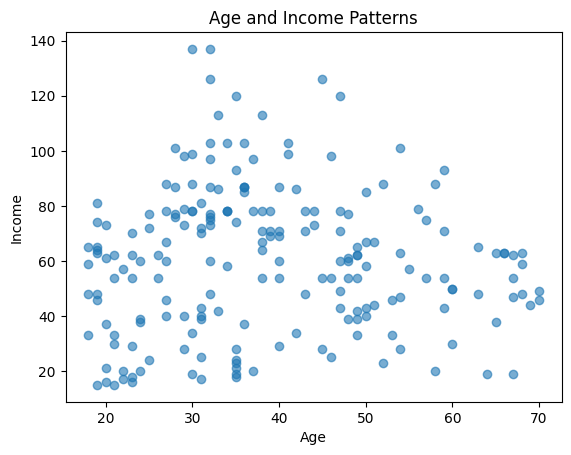

In [70]:
# make an insightful visualization and explain
import matplotlib.pyplot as plt

plt.scatter(df["Age"], df["AnnualIncome"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and Income Patterns")
plt.show()

Income tertinggi berada di Age diantara 30-50 tahun (dilihat ada titik tertinggi)

<ipython-input-71-687f9dc2ea2c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='SpendingScore', hue='AnnualIncome', data=df, ci=None, estimator=np.mean)


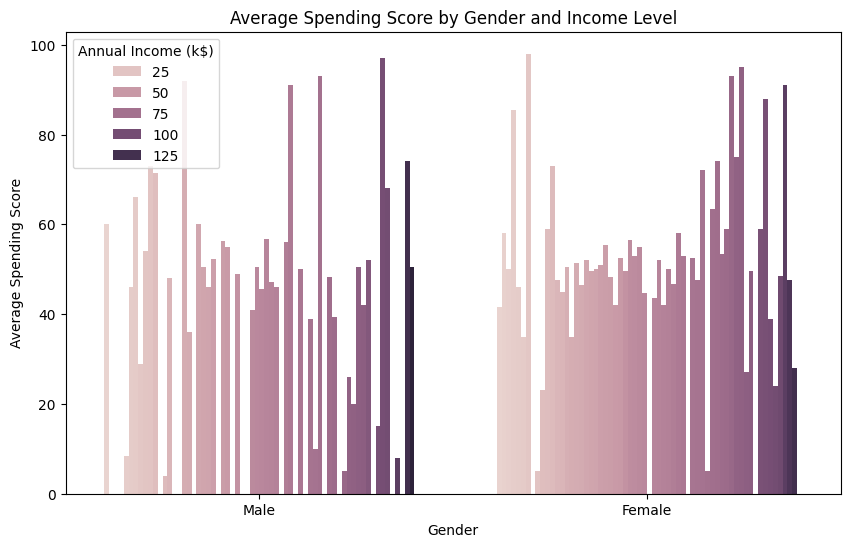

In [71]:
# prompt: # make an insightful visualization using bar chart

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='SpendingScore', hue='AnnualIncome', data=df, ci=None, estimator=np.mean)
plt.title('Average Spending Score by Gender and Income Level')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.legend(title='Annual Income (k$)')
plt.show()

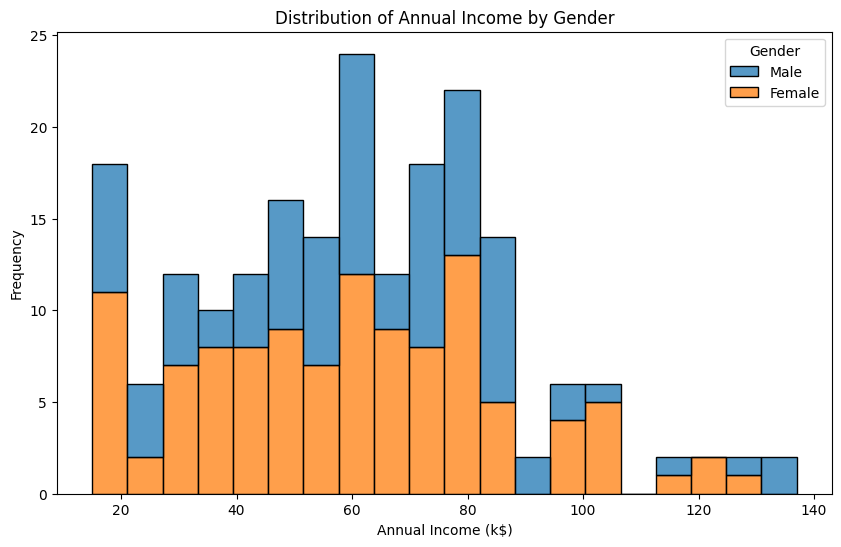

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AnnualIncome', hue='Gender', multiple='stack', bins=20)
plt.title('Distribution of Annual Income by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

Kebanyakan orang mendapat pendapatan sekitar 60 ditemukan ada lebih dari 20 data.

## Data Preprocessing

For this case study, we only use income and spending score

In [73]:
# create new dataframe that consist only annual income and spending score

new_df = df[['AnnualIncome', 'SpendingScore']]

In [74]:
new_df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [75]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_data, columns=['AnnualIncome', 'SpendingScore'])

scaled_df.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [76]:
scaled_df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


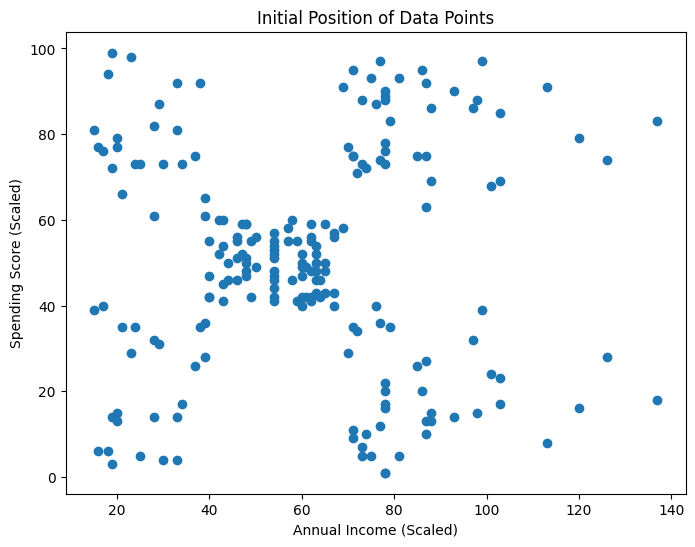

In [77]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Initial Position of Data Points')
plt.show()

Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

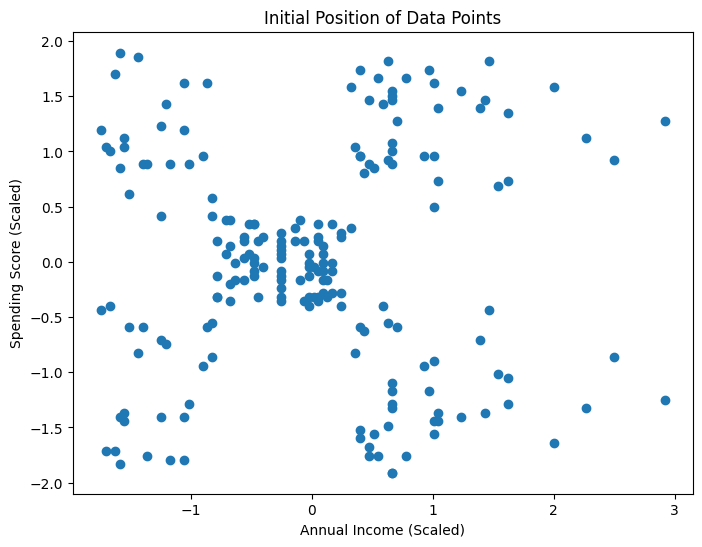

In [78]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['AnnualIncome'], scaled_df['SpendingScore'])
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Initial Position of Data Points')
plt.show()

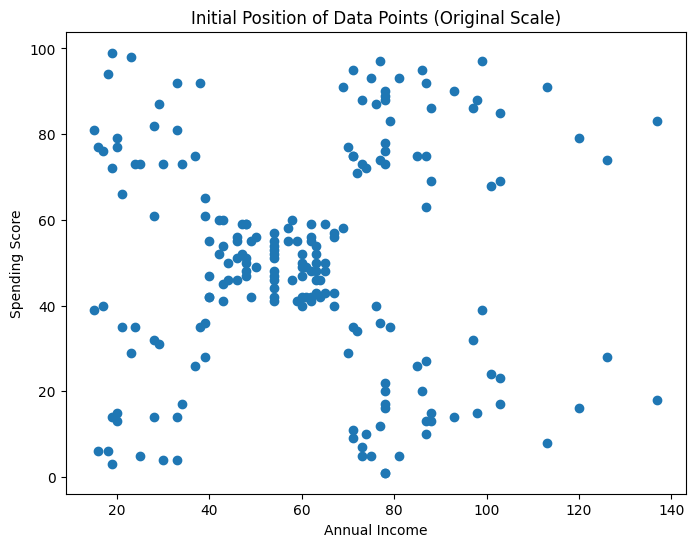

In [79]:
# Visualize the position using the original scale

plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Initial Position of Data Points (Original Scale)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

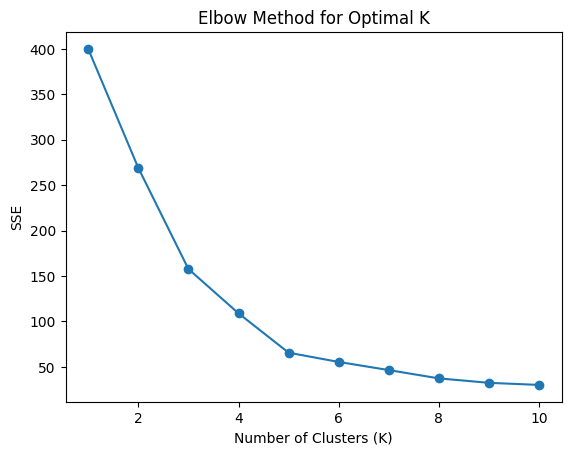

Optimal K (elbow point) is: 5


In [80]:
# set the parameter for evaluating K
# Set the range for evaluating K
k_range = range(1, 11)

# Initialize an empty list to store the inertia values
inertia_values = []

# Iterate through different values of K
for k in k_range:
  kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
  kmeans.fit(scaled_df)
  inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

# Use KneeLocator to find the elbow point
kl = KneeLocator(k_range, inertia_values, curve="convex", direction="decreasing")
optimal_k = kl.elbow

print(f"Optimal K (elbow point) is: {optimal_k}")

In [81]:

# Use KneeLocator to find the elbow point
kl = KneeLocator(k_range, inertia_values, curve="convex", direction="decreasing")
optimal_k = kl.elbow

print(f"The best k for you model is {optimal_k}")


The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [82]:
from sklearn.cluster import KMeans

# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

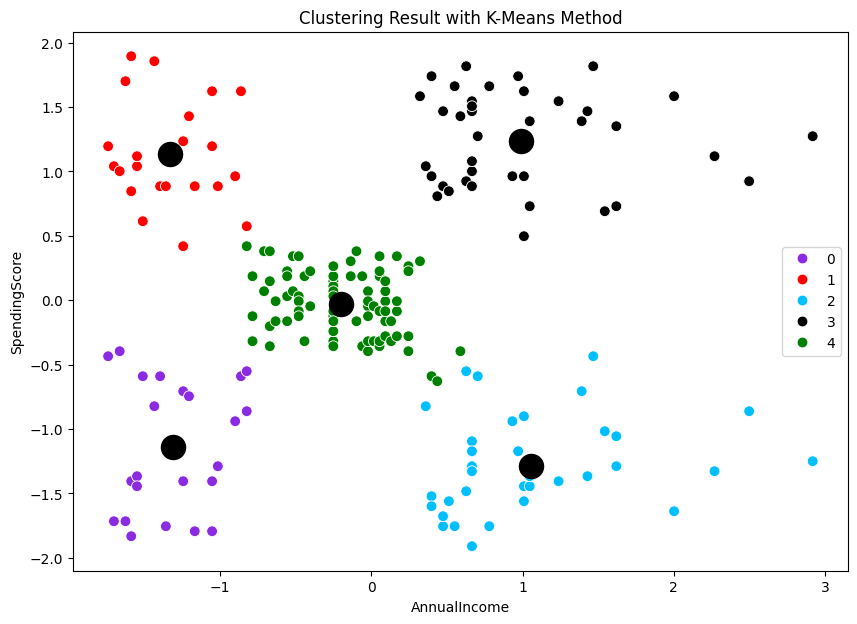

In [83]:
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "black", "green"], data=scaled_df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [84]:
# Inverse transform the scaled data to get the original values
scaled_df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=["AnnualIncome", "SpendingScore"])

# Add the cluster labels to the original data
scaled_df['Cluster'] = y_pred

# analyze the clusters with the original values
scaled_df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [86]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = scaled_df.groupby(y_pred).agg({'AnnualIncome': ['mean', 'std', 'min', 'max'],
                                              'SpendingScore': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

AnnualIncome                         SpendingScore                   \
                mean        std   min    max          mean        std   min   
cluster                                                                       
0          26.304348   7.893811  15.0   39.0     20.913043  13.017167   3.0   
1          25.727273   7.566731  15.0   39.0     79.363636  10.504174  61.0   
2          88.200000  16.399067  70.0  137.0     17.114286   9.952154   1.0   
3          86.538462  16.312485  69.0  137.0     82.128205   9.364489  63.0   
4          55.296296   8.988109  39.0   76.0     49.518519   6.530909  34.0   

               
          max  
cluster        
0        40.0  
1        99.0  
2        39.0  
3        97.0  
4        61.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Hasil dari praktek metode K-Means kali ini, yang membagi data berdasarkan dua variabel: Annual Income (pendapatan tahunan) di sumbu x dan Spending Score (skor pengeluaran) di sumbu y. Setiap warna pada grafik menunjukkan klaster yang berbeda, dengan total lima klaster (diberi label 0, 1, 2, 3, dan 4).

Poin-poin kecil menunjukkan data individual dalam setiap klaster, sedangkan lingkaran besar menandai posisi centroid (titik pusat) dari masing-masing klaster. Berikut interpretasi dari setiap klaster:

Klaster Ungu (0): Terletak di bagian kiri bawah grafik, menunjukkan kelompok individu dengan pendapatan tahunan dan skor pengeluaran yang relatif rendah.
Klaster Merah (1): Terletak di kiri atas, berisi individu dengan skor pengeluaran tinggi tetapi pendapatan tahunan rendah.
Klaster Hijau (2): Terletak di tengah, menunjukkan individu dengan skor pengeluaran dan pendapatan tahunan yang sedang.
Klaster Hitam (3): Terletak di bagian atas tengah, menunjukkan kelompok individu dengan pendapatan tahunan tinggi dan skor pengeluaran tinggi.
Klaster Biru Muda (4): Terletak di kanan bawah, menunjukkan individu dengan pendapatan tahunan tinggi tetapi skor pengeluaran yang rendah.
Metode ini berguna untuk mengelompokkan individu berdasarkan pola pengeluaran dan pendapatan tahunan mereka, yang dapat bermanfaat bagi analisis pemasaran atau segmentasi pelanggan.

<write here>